In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
# Load data
# This assumes data is in a DataFrame called df with 'NDVI', 'NBR' as columns and 'label' as target column
df = pd.read_csv('data_file.csv')

In [5]:
# Split data into training and test set
X = df[['NDVI', 'NBR']]
y = df['label']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
# Make predictions
y_pred = knn.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
# Evaluate the model

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9

[[3 1]
 [0 5]]


In [9]:
from sklearn.model_selection import GridSearchCV
# Fine-tuning the model using Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [10]:
from sklearn.inspection import permutation_importance

# Assume knn is your trained KNN model and X_test, y_test are your test data
result = permutation_importance(knn, X_test, y_test, n_repeats=30, random_state=42, n_jobs=-1)

# Get importances and their standard deviations
importances = result.importances_mean
std = result.importances_std

# Displaying feature importances
for feature, importance, std in zip(['NDVI', 'NBR'], importances, std):
    print(f"Feature: {feature}, Importance: {importance} ± {std}")


Feature: NDVI, Importance: 0.23703703703703696 ± 0.156434904310688
Feature: NBR, Importance: 0.10370370370370369 ± 0.08574694002066832


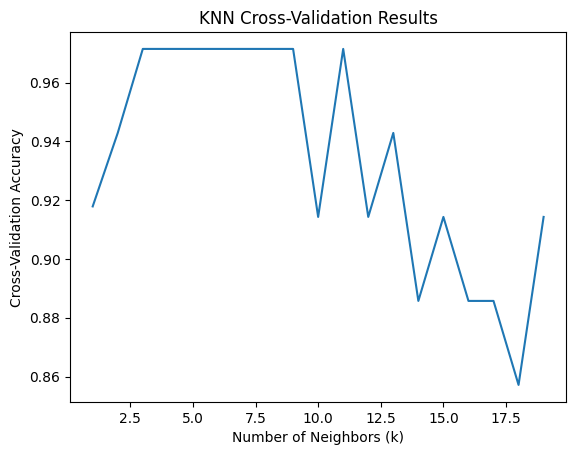

The optimal number of neighbors is 3


''

In [11]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Range of k values to test; ensuring k is less than the number of samples
k_values = range(1, min(20, len(X_train) - 1))

# List to store cross-validation scores
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=min(5, len(X_train)))
    cv_scores.append(scores.mean())

# Find the k value with the maximum score
optimal_k = k_values[cv_scores.index(max(cv_scores))]

# Plotting k values against cross-validation scores
plt.plot(k_values, cv_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Cross-Validation Results')
plt.show()

print(f"The optimal number of neighbors is {optimal_k}")

;

In [12]:
# Algorithm comparison, eg. with Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

rf_predictions = rf_classifier.predict(X_test)

# a. Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

# b. Classification Report
rf_class_report = classification_report(y_test, rf_predictions)
print('Random Forest Classification Report:\n', rf_class_report)

# c. Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print('Random Forest Confusion Matrix:\n', rf_conf_matrix)

Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Random Forest Confusion Matrix:
 [[4 0]
 [0 5]]
